<a href="https://colab.research.google.com/github/Somesh140/ANN/blob/main/cv/Understanding_cv_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os

In [15]:
os.listdir()

['Data Cleaning.ipynb',
 'notebook.ipynb',
 'EDA for Kaggle dataset.ipynb',
 'pandas-profiling.ipynb',
 'Copy of Practise Problems.ipynb',
 'ANN.ipynb',
 'car1.jpeg',
 'Understanding_cv_basics.ipynb']

In [16]:
ROOT = "/content/drive/MyDrive/Colab Notebooks"

In [17]:
os.chdir(ROOT)

In [18]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [19]:
os.listdir()

['Data Cleaning.ipynb',
 'notebook.ipynb',
 'EDA for Kaggle dataset.ipynb',
 'pandas-profiling.ipynb',
 'Copy of Practise Problems.ipynb',
 'ANN.ipynb',
 'car1.jpeg',
 'Understanding_cv_basics.ipynb']

In [20]:
img_path="car1.jpeg"

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 #opencv lib

In [22]:
car1=mpimg.imread(img_path)

In [23]:
car1.shape

(168, 300, 3)

In [24]:
type(car1)

numpy.ndarray

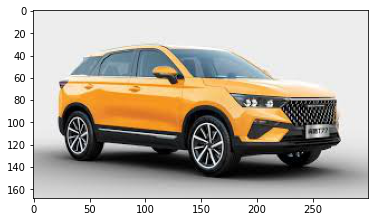

In [25]:
plt.imshow(car1)

In [26]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [27]:
car1_cv2 = cv2.imread(img_path)

In [28]:
# cv2.imshow("image", car1_cv2) # Will work only in local pc

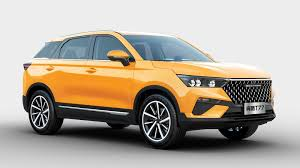

In [29]:
from google.colab.patches import cv2_imshow
cv2_imshow(car1_cv2)

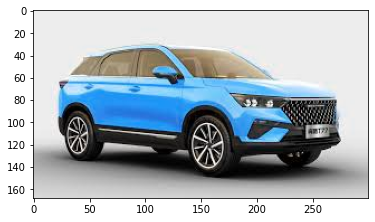

In [30]:
plt.imshow(car1_cv2) # cv2 reads images as BGR and in matplotlib reads as RGB

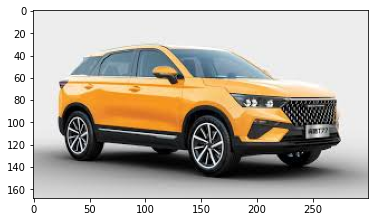

In [31]:
car1_cv2_BGR_RGB=cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

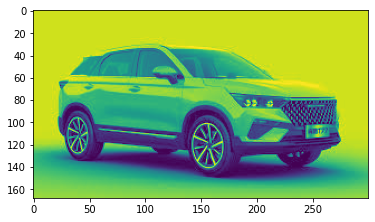

In [32]:
car1_cv2_BGR_GRAY=cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY)

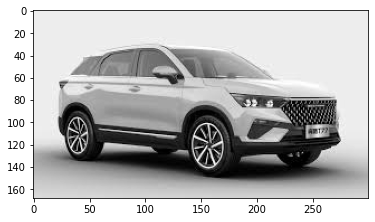

In [33]:
car1_cv2_BGR_GRAY=cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY,cmap="gray")

In [34]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [36]:
car1_cv2_BGR_GRAY.min(),car1_cv2_BGR_GRAY.max()

(0, 255)

In [85]:
#understanding composition of coloured images
def visualize_RGB_channel(imgarray=None,figsize=(10,7)):
  #splitting RGB components
  B,G,R = cv2.split(imgarray)

  #create zero matrix of shape of image
  Z = np.zeros(B.shape,dtype=B.dtype) #can use any channel

  # initialize subplots
  fig,ax = plt.subplots(2,2,figsize=figsize)

  #plotting the actual image and RGB IMAGES
  [axi.set_axis_off() for axi in ax.flatten()]

  ax[0,0].set_title("Original Image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("green ch  Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))


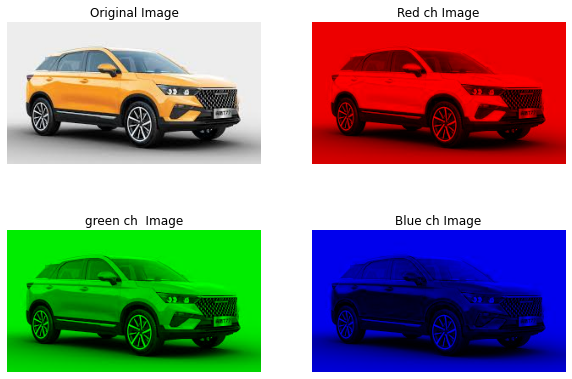

In [86]:
visualize_RGB_channel(imgarray=car1_cv2)

In [45]:
random_colored_image=np.random.randint(0,255,(6,6,3))
random_colored_image.shape

(6, 6, 3)

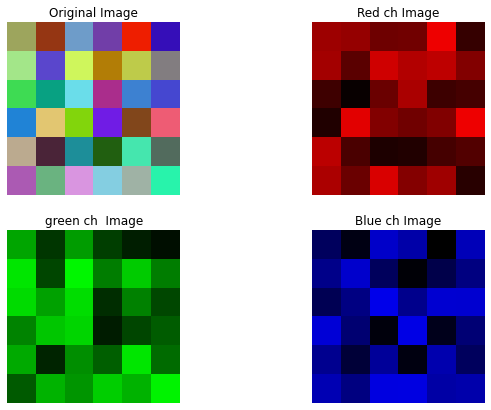

In [46]:
visualize_RGB_channel(random_colored_image)

In [49]:
sobel= np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

In [50]:
print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [51]:
print("for highlighting vertical images \n", sobel)

for highlighting vertical images 
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [52]:
print("for highlighting horizontal images \n", sobel.T)

for highlighting horizontal images 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [53]:
example1=[[0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,255,255,255,255],
          [0,0,0,0,255,255,255,255,255,255,255,255],
          [0,0,0,0,255,255,255,255,255,255,255,255],
          [0,0,0,0,255,255,255,255,255,255,255,255],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0]]

example1 =np.array(example1)

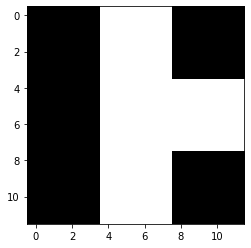

In [54]:
plt.imshow(example1,cmap="gray")

In [55]:
def simple_conv(imgFilter=None,picture=None):
  #extract the shape of the image
  P_row,P_col= picture.shape

  #shape of image filter
  k = imgFilter.shape[0] #k=3

  temp= list()

  stride =1 

  #resultant image size
  final_cols = (P_col-k)//stride +1
  final_rows = (P_row-k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    #take horizontal right stride across col by col
    for h_stride in range(final_cols):
      target_area_pic = picture[v_stride:v_stride+k,h_stride:h_stride+k]
      z=sum(sum(target_area_pic*imgFilter))
      temp.append(z)

  resultant_image= np.array(temp).reshape(final_rows,final_cols)
  return resultant_image

In [56]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

In [57]:
sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [58]:
k = 3
v_stride = 0
h_stride = 0 + 1 + 1
target_area = example1[v_stride: v_stride + k, h_stride: h_stride + k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [59]:
sum(sum(target_area*sobel))

-1020

In [60]:
result=simple_conv(imgFilter=sobel,picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

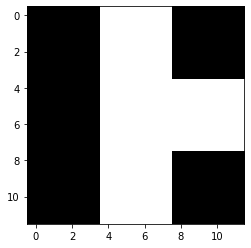

In [61]:
plt.imshow(example1, cmap="gray")

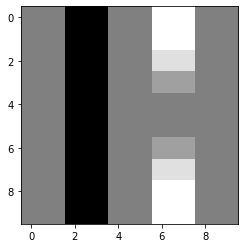

In [62]:
plt.imshow(result, cmap="gray")

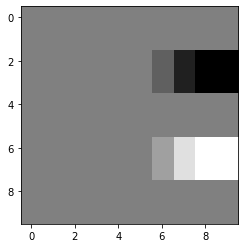

In [63]:
result = simple_conv(imgFilter=sobel.T, picture=example1)
plt.imshow(result, cmap="gray")

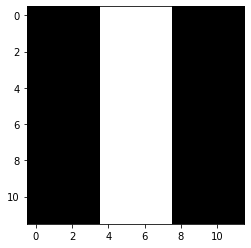

In [64]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

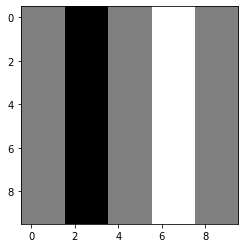

In [65]:
result = simple_conv(imgFilter=sobel, picture=example2)
plt.imshow(result, cmap="gray")

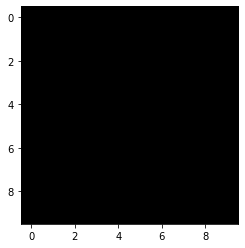

In [66]:
result = simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result, cmap="gray")

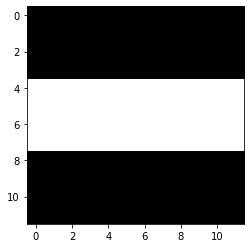

In [67]:
example2_T = np.array(example2.T)
plt.imshow(example2_T, cmap="gray")

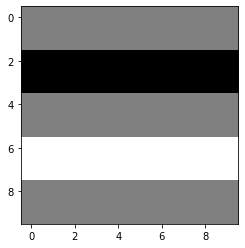

In [68]:
result = simple_conv(imgFilter=sobel.T, picture=example2_T)
plt.imshow(result, cmap="gray")

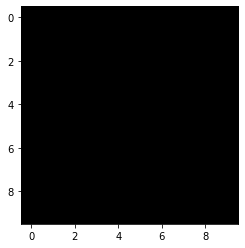

In [69]:
result = simple_conv(imgFilter=sobel, picture=example2_T)
plt.imshow(result, cmap="gray")

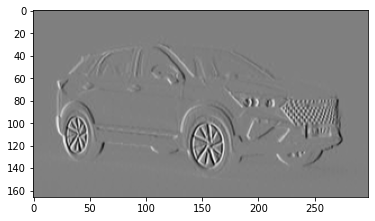

In [70]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

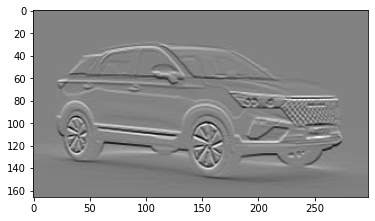

In [71]:
result = simple_conv(imgFilter=sobel.T, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [74]:
random_f= np.random.randn(3,3)
random_f

array([[-1.04811781, -0.48023692, -0.41239704],
       [-2.60035573,  0.91308951, -0.3072702 ],
       [-0.0504506 , -1.06655634,  1.15176912]])

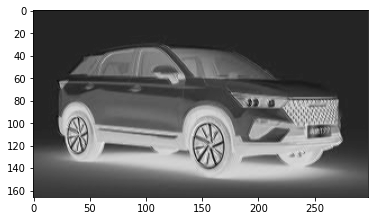

In [75]:
result = simple_conv(imgFilter=random_f, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [87]:
mat_1 =[[1,2,3],
        [7,8,9],
        [13,14,15]]
mat2 = sobel

In [88]:
mat_1*sobel

array([[  1,   0,  -3],
       [ 14,   0, -18],
       [ 13,   0, -15]])

In [89]:
np.multiply(mat_1,mat2)

array([[  1,   0,  -3],
       [ 14,   0, -18],
       [ 13,   0, -15]])

In [90]:
mat_1@mat2

array([[  8,   0,  -8],
       [ 32,   0, -32],
       [ 56,   0, -56]])